In [71]:
import deepNN as dnn
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
def L2_norm(y_pred,y_ex):
    return np.linalg.norm(y_pred.flatten().cpu()- y_ex) / np.sqrt(len(y_ex))

In [73]:
a, b = 0, 1
N = 1000

torch.manual_seed(0) # fix random seed
x = (b - a) * torch.rand(N, 1) + a
def func(x): return torch.sin(torch.pi*x) 
def dfunc(x): return torch.pi*torch.cos(torch.pi*x) 
def deltafunc(x): return torch.pi**2*torch.sin(torch.pi*x) 

y = func(x) 

nn = dnn.DeepNet(torch.tanh, 1, [20]*3, 1) 

optimizer = torch.optim.Adam(nn.parameters(), lr=0.01)
n_epochs = 500

pbar = trange(n_epochs)
for epoch in pbar:
    y_pred = nn(x) 
    loss = torch.sum((y_pred - y)**2)/N
    
    pbar.set_description(f"Loss {loss:.2g}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Loss 5.3e-06: 100%|██████████| 500/500 [00:02<00:00, 240.48it/s]


In [ ]:
# Export the model into ONNX format
nn.eval()

# Create dummy input
dummy_input = x
# Export the nn to ONNX
input_names = ["input"]  # Input tensor name
output_names = ["output"]  # Output tensor name
onnx_filename = "nn.onnx"  # ONNX nn file name

torch.onnx.export(nn, dummy_input, onnx_filename, input_names=input_names, output_names=output_names, export_params=True)


<center>
    <img src="./nn_onnx.png" alt="Architecture_nn" style="height:800px;">
</center>

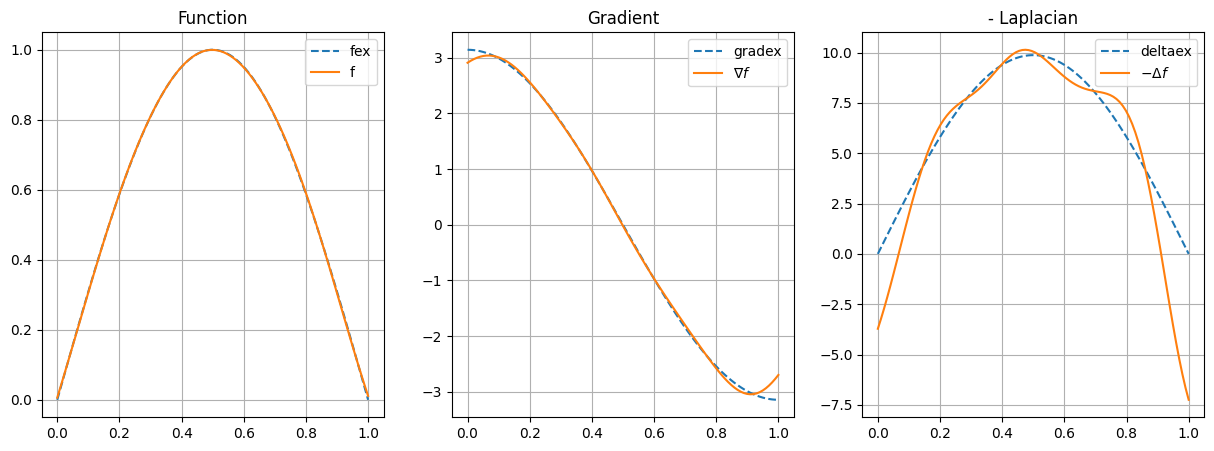

Report:
L2 error: 2.342179e-03
H1 semi-norm error: 8.871563e-02


In [75]:
x = torch.linspace(0, 1, 100)
y = nn(x)
dy = nn.gradient(x)
deltay = nn.laplacian(x)



with torch.no_grad():

    yex = func(x).cpu()
    dyex = dfunc(x).cpu()
    deltaex = deltafunc(x).cpu()

    x_np = x.cpu()

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x_np, yex, '--', label='fex')
    plt.plot(x_np, y.cpu(), label='f')
    plt.legend()
    plt.grid()
    plt.title('Function')

    plt.subplot(1, 3, 2)
    plt.plot(x_np, dyex, '--', label='gradex')
    plt.plot(x_np, dy.flatten().cpu(), label=r"$\nabla f$")
    plt.legend()
    plt.grid()
    plt.title('Gradient')

    plt.subplot(1, 3, 3)
    plt.plot(x_np, deltaex, '--', label='deltaex')
    plt.plot(x_np, deltay.cpu(), label=r"$-\Delta f$")
    plt.legend()
    plt.grid()
    plt.title('- Laplacian')
    plt.show()
    print(
            'Report:''\n'
            f'L2 error: {L2_norm(y,yex):4e}''\n'
            f'H1 semi-norm error: {L2_norm(dy,dyex):4e}'
        )
   

In [76]:
a, b = 0., 1.
N = 1000

x = (b - a) * torch.rand(N, 1) + a

bound = torch.tensor([a, b])
n_epochs = 500

deltaex = deltafunc(x)

pbar = trange(n_epochs)
for epoch in pbar:
    delta_pred = nn.laplacian(x) 
    loss = torch.sum((delta_pred - deltaex)**2)/N + torch.sum(nn(bound)**2)
        
    pbar.set_description(f"Loss {loss:.2g}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Loss 3.5e-05: 100%|██████████| 500/500 [00:05<00:00, 88.79it/s]


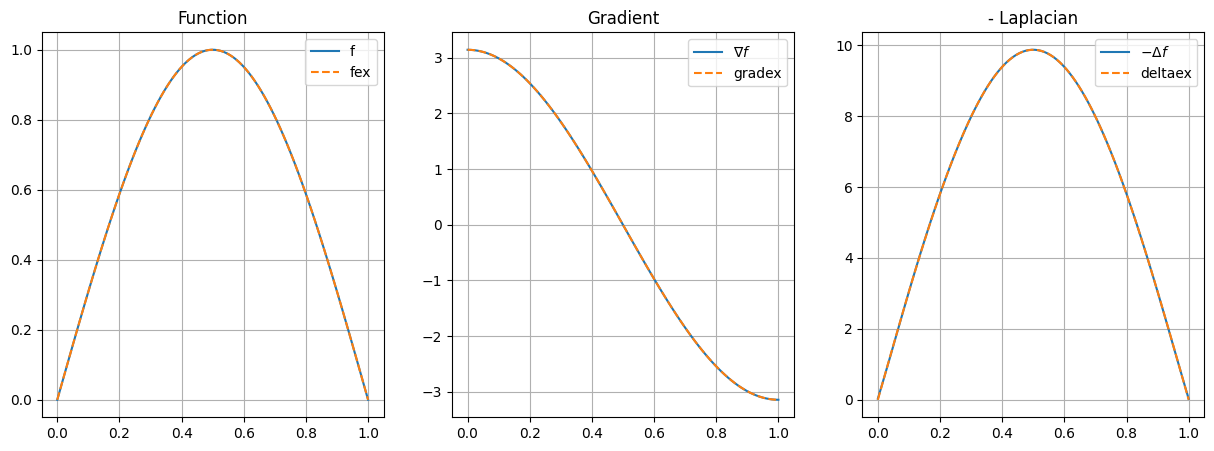

Report:
L2 error: 1.013510e-05
H1 semi-norm error: 1.774522e-04


In [77]:
x = torch.linspace(0, 1, 100)
y = nn(x)
dy = nn.gradient(x)
deltay = nn.laplacian(x)

with torch.no_grad():
    yex = func(x).cpu()
    dyex = dfunc(x).cpu()
    deltaex = deltafunc(x).cpu()

    x_np = x.cpu()

    figure = plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x_np, y.cpu(), label='f')
    plt.plot(x_np, yex, '--', label='fex')
    plt.legend()
    plt.grid()
    plt.title('Function')

    plt.subplot(1, 3, 2)
    plt.plot(x_np, dy.flatten().cpu(), label=r"$\nabla f$")
    plt.plot(x_np, dyex, '--', label='gradex')
    plt.legend()
    plt.grid()
    plt.title('Gradient')

    plt.subplot(1, 3, 3)
    plt.plot(x_np, deltay.cpu(), label=r"$-\Delta f$")
    plt.plot(x_np, deltaex, '--', label='deltaex')
    plt.legend()
    plt.grid()
    plt.title('- Laplacian')

    plt.show()
    print(
                'Report:''\n'
                f'L2 error: {L2_norm(y,yex):4e}''\n'
                f'H1 semi-norm error: {L2_norm(dy,dyex):4e}'
            )
   

# ResNet

In [78]:
a, b = 0, 1
N = 1000

x = (b - a) * torch.rand(N, 1) + a
def func(x): return torch.sin(torch.pi*x) 
def dfunc(x): return torch.pi*torch.cos(torch.pi*x) 
def deltafunc(x): return torch.pi**2*torch.sin(torch.pi*x) 

y = func(x) 

nn = dnn.ResNet(torch.tanh, 1, [20]*3, 1) 

optimizer = torch.optim.Adam(nn.parameters(), lr=0.01)
n_epochs = 500

pbar = trange(n_epochs)
for epoch in pbar:
    y_pred = nn(x) 
    loss = 1.0/N * torch.sum((y_pred - y)**2)
    
    pbar.set_description(f"Loss {loss:.2g}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Loss 3.9e-06: 100%|██████████| 500/500 [00:02<00:00, 231.82it/s]


In [ ]:
# Export the model into ONNX format
nn.eval()

# Create dummy input
dummy_input = x
# Export the nn to ONNX
input_names = ["input"]  # Input tensor name
output_names = ["output"]  # Output tensor name
onnx_filename = "resnn.onnx"  # ONNX nn file name

torch.onnx.export(nn, dummy_input, onnx_filename, input_names=input_names, output_names=output_names, export_params=True)


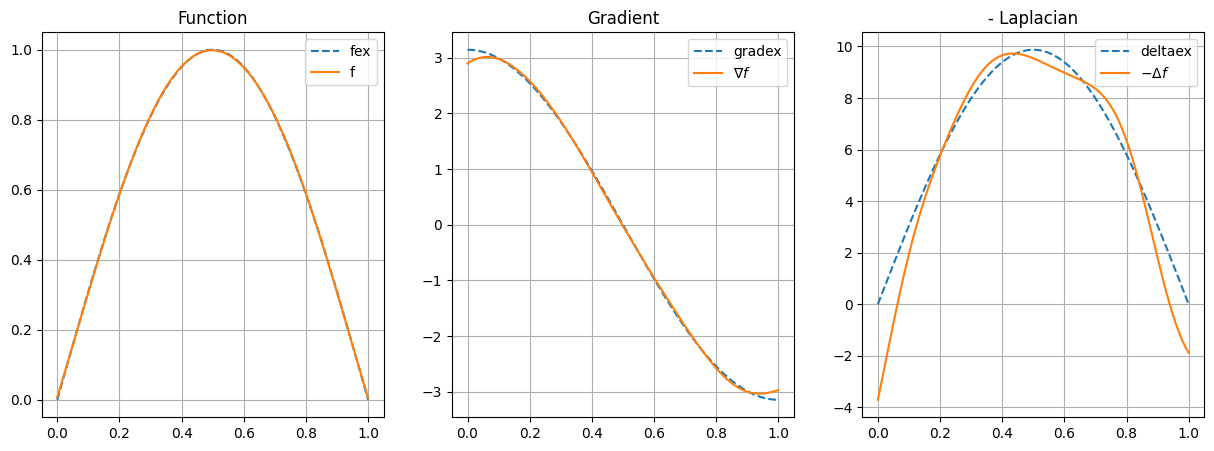

Report:
L2 error: 2.053723e-03
H1 semi-norm error: 5.887119e-02


In [79]:
x = torch.linspace(0, 1, 100)
y = nn(x)
dy = nn.gradient(x)
deltay = nn.laplacian(x)

with torch.no_grad():
    yex = func(x).detach().cpu()
    dyex = dfunc(x).detach().cpu()
    deltaex = deltafunc(x).detach().cpu()

    x_np = x.detach().cpu()

    figure = plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x_np, yex, '--', label='fex')
    plt.plot(x_np, y.detach().cpu(), label='f')
    plt.legend()
    plt.grid()
    plt.title('Function')

    plt.subplot(1, 3, 2)
    plt.plot(x_np, dyex, '--', label='gradex')
    plt.plot(x_np, dy.flatten().detach().cpu(), label=r"$\nabla f$")
    plt.legend()
    plt.grid()
    plt.title('Gradient')

    plt.subplot(1, 3, 3)
    plt.plot(x_np, deltaex, '--', label='deltaex')
    plt.plot(x_np, deltay.detach().cpu(), label=r"$-\Delta f$")
    plt.legend()
    plt.grid()
    plt.title('- Laplacian')
    plt.show()

    print(
            'Report:''\n'
            f'L2 error: {L2_norm(y,yex):4e}''\n'
            f'H1 semi-norm error: {L2_norm(dy,dyex):4e}'
        )
   

In [80]:
a, b = 0., 1.
N = 1000

x = (b - a) * torch.rand(N, 1) + a

bound = torch.tensor([a, b])
n_epochs = 500

deltaex = deltafunc(x)

pbar = trange(n_epochs)
for epoch in pbar:
    delta_pred = nn.laplacian(x) 
    loss = torch.sum((delta_pred - deltaex)**2)/N + torch.sum(nn(bound)**2)
        
    pbar.set_description(f"Loss {loss:.2g}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  0%|          | 0/500 [00:00<?, ?it/s]

Loss 0.00023: 100%|██████████| 500/500 [00:06<00:00, 77.83it/s]


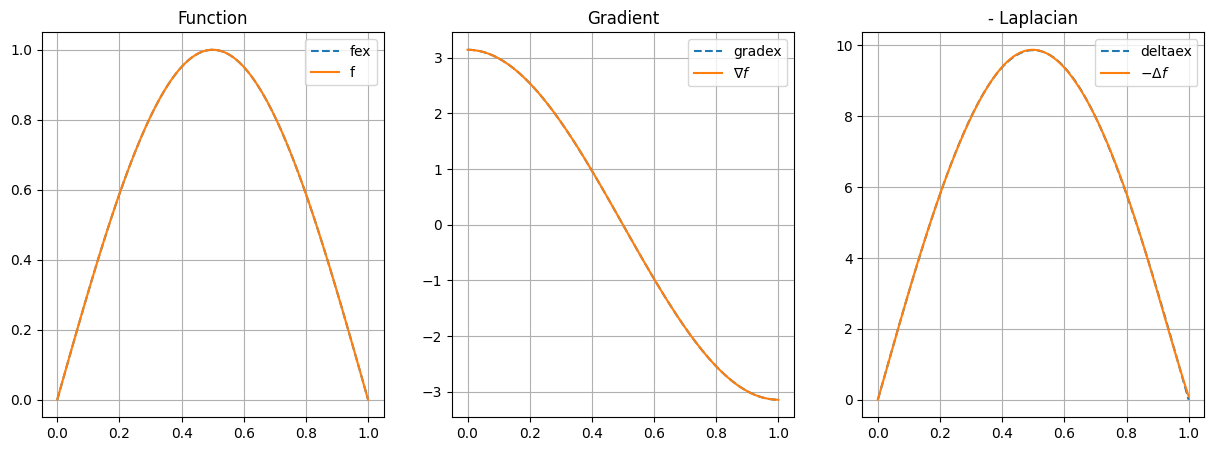

Report:
L2 error: 1.331225e-04
H1 semi-norm error: 7.065949e-04


In [82]:
x = torch.linspace(0, 1, 100)
y = nn(x)
dy = nn.gradient(x)
deltay = nn.laplacian(x)

with torch.no_grad():
    yex = func(x).cpu()
    dyex = dfunc(x).cpu()
    deltaex = deltafunc(x).cpu()

    x_np = x.cpu()

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x_np, yex, '--', label='fex')
    plt.plot(x_np, y.cpu(), label='f')
    plt.legend()
    plt.grid()
    plt.title('Function')

    plt.subplot(1, 3, 2)
    plt.plot(x_np, dyex, '--', label='gradex')
    plt.plot(x_np, dy.flatten().cpu(), label=r"$\nabla f$")
    plt.legend()
    plt.grid()
    plt.title('Gradient')

    plt.subplot(1, 3, 3)
    plt.plot(x_np, deltaex, '--', label='deltaex')
    plt.plot(x_np, deltay.cpu(), label=r"$-\Delta f$")
    plt.legend()
    plt.grid()
    plt.title('- Laplacian')
    plt.show()

    print(
            'Report:''\n'
            f'L2 error: {L2_norm(y,yex):4e}''\n'
            f'H1 semi-norm error: {L2_norm(dy,dyex):4e}'
        )